<font size="+3"><b>Non-Linear Models and Validation Metrics</b></font>

<font color='Red'>
In this project, we will need to write code that uses non-linear models to perform classification and regression tasks. We will also be describing the process by whichthe code was written. More details can be found below. Any websites or AI tools used will be cited, if used.</font>

NOTE: You may use the Table of Content on the left side of this notebook to efficiently navigate within this document/project.

---

|                **Question**                |
|:------------------------------------------:|
|           **Part 1: Regression**           |  
|          Step 0: Import Libraries          |          
|             Step 1: Data Input             |    
|           Step 2: Data Processing          |     
| Step 3: Implement   Machine Learning Model |    
|           Step 4: Validate Model           |    
|         Step 5: Visualize   Results        |     
|                  Questions                 |    
|             Process Description            |     
|         **Part 2: Classification**         |
|             Step 1: Data Input             |    
|           Step 2: Data Processing          |    
| Step 3: Implement   Machine Learning Model |           
|            Step 4: Validate Mode           |           
|         Step 5: Visualize   Results        |    
|                  Questions                 |     
|             Process Description            |
|         **Part 3: LinearSVC**         |  

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression**

For this section, we will be continuing with the concrete example from yellowbrick. We will be comparing these results to the results from the project 1, where we used linear models.

## **Step 1:** Data Input

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Using the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

# Load the concrete dataset
X, y = load_concrete()

## **Step 2:** Data Processing

Data processing was completed in the previous project already. We do not need to repeat that here again.

## **Step 3:** Implement Machine Learning Model

1. Importing the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiating the three models with `max_depth = 5`
3. Implementing each machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculating the average training and validation accuracy using mean squared error with cross-validation. To do this, we will be setting `scoring='neg_mean_squared_error'` in our `cross_validate` function and will negate the results (multiply by -1)

## **Step 5:** Visualize Results

1. Creating a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Adding the accuracy results to the `results` DataFrame
3. Printing `results`

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate

# Instantiating the models
dt_model = DecisionTreeRegressor(max_depth=5, random_state=0)
rf_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
gb_model = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100, learning_rate=0.1)

# Implementing each machine learning model
# dt_model.fit(X, y)
# rf_model.fit(X, y)
# gb_model.fit(X, y)

# Defining the scoring metric for cross-validation (repetitive code)
scoring_var = 'neg_mean_squared_error'

# Performing cross-validation for each model
dt_scores = cross_validate(dt_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)
rf_scores = cross_validate(rf_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)
gb_scores = cross_validate(gb_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)

# Calculating the average training and validation accuracy
dt_train_avg = dt_scores['train_score'].mean()
dt_test_avg = dt_scores['test_score'].mean()

rf_train_avg = rf_scores['train_score'].mean()
rf_test_avg = rf_scores['test_score'].mean()

gb_train_avg = gb_scores['train_score'].mean()
gb_test_avg = gb_scores['test_score'].mean()

tmp_results_test= [dt_test_avg, rf_test_avg, gb_test_avg]
tmp_results_train = [dt_train_avg, rf_train_avg, gb_train_avg]
new_results_train, new_results_test = [], []

for i in range(len(tmp_results_test)):
    new_results_train.append(tmp_results_train[i] * -1)
    new_results_test.append(tmp_results_test[i] * -1)

# Creating a pandas DataFrame to store the results
results = pd.DataFrame({"Training accuracy": new_results_train, "Validation accuracy": new_results_test}, index=['DT', 'RF', 'GB'])

# Printing the results
print(results)

    Training accuracy  Validation accuracy
DT          30.804969           244.559027
RF          22.009196           233.010203
GB           2.100764           157.240330


Repeating the step above to print the R2 score instead of the mean-squared error. For this case, we can now use `scoring='r2'`.

In [4]:
# Defining the scoring metric for cross-validation (repetitive code)
scoring_var = 'r2'

# Performing cross-validation for each model with r2 scoring
dt_scores_r2 = cross_validate(dt_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)
rf_scores_r2 = cross_validate(rf_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)
gb_scores_r2 = cross_validate(gb_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)

# Calculating the average training and validation accuracy
dt_train_avg = dt_scores_r2['train_score'].mean()
dt_test_avg = dt_scores_r2['test_score'].mean()

rf_train_avg = rf_scores_r2['train_score'].mean()
rf_test_avg = rf_scores_r2['test_score'].mean()

gb_train_avg = gb_scores_r2['train_score'].mean()
gb_test_avg = gb_scores_r2['test_score'].mean()

tmp_results_test= [dt_test_avg, rf_test_avg, gb_test_avg]
tmp_results_train = [dt_train_avg, rf_train_avg, gb_train_avg]
new_results_train, new_results_test = [], []

for i in range(len(tmp_results_test)):
    new_results_train.append(tmp_results_train[i])
    new_results_test.append(tmp_results_test[i])

# Creating a pandas DataFrame to store the results
results_r2 = pd.DataFrame({"Training accuracy": new_results_train, "Validation accuracy": new_results_test}, index=['DT', 'RF', 'GB'])

# Printing the results
print(results_r2)

    Training accuracy  Validation accuracy
DT           0.867502            -0.080545
RF           0.905799            -0.030577
GB           0.991863             0.308657


## **Practice descriptive questions & answers for theoratical understanding**
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>
1. The results obtained using non-linear models (Decision Tree, Random Forest, and Gradient Boosting) are of course expected to be different from the results obtained using a linear model, as we did in assignment 2. Since linear model assumes a linear relationship between the features and the target variable and non-linear models capture more complex relationships, the non-linear models are expected to perform better than the linear model. However, results are very poor in this case. The R2 score on the previous assignment was 0.636898 but the score on this assignment is achieved to be -0.080545 for the Decision Tree model. Additionally, the Random Forest model achieved a score of -0.030577 and the Gradient Boosting model achieved a score of 0.308657. It can be observed clearly that there is a significant drop here and even negative values for some, showing that the non-linear models are not performing well at all on this dataset. 

2. Based on the results obtained above, the model that has the highest validation accuracy is Gradient Boosted Trees (GB) as opposed to the performances of the Decision Tree (DT) and Random Forest (RF) models. With better generalization performance, it even has a higher training accuracy as compared to other 2.

3. To increase the accuracy of these tree-based models, we might want to imlement the following strategies:
   - Increase the depth of the trees by increasing the `max_depth` parameter, the trees can capture more complex relationships in the data. However, there will be a great chance for overfitting the training data.
   - Adjust the hyperparameters by trying different hyperparameter values, such as the number of estimators (`n_estimators`), learning rate (`learning_rate`), and other parameters specific to each model.
</b></font>


## **Process Description/How code was written/Sourcing etc**
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

<font color='Green'><b>

Using the above written practice questions as guidance, the following layout is used to describe the process:
1. The code I used in this Jupyter Notebook was sourced or writen by me and the existing cells information, where necessary.

2. As per the professional steps carried out in real-world, I filled/completed these cells in the following order:
    - Step 1: Data Input
    - Step 2: Data Processing (No action was required by me)
    - Step 3: Implement Machine Learning Model
    - Step 4: Validate Model
    - Step 5: Visualize Results
    - Answring the questions

3. No, I did not use generative AI for this. I manually wrote it based on the requirements.

</b></font>

# **Part 2: Classification**

Developing code that can help the user classify different wine samples. Following the machine learning workflow, we will write the relevant code in each of the steps below:

## **Step 1:** Data Input

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Using the pandas library to load the dataset. And then defining the column headers if they are not included in the dataset. We will then split the dataset into feature matrix `X` and target vector `y` and print the size and type of `X` and `y`

In [5]:
# Import wine dataset
from ucimlrepo import fetch_ucirepo

# Load the wine dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# Print the shape of the dataset
print(X.size, '&', y.size)

2314 & 178


## **Step 2:** Data Processing

Printing the first five rows of the dataset to inspect:

In [6]:
print(X.head(5), '\n\n', y.head(5))

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

Checking to see if there are any missing values in the dataset. If necessary, selecting an appropriate method to fill-in the missing values

In [7]:
print(X.isnull().sum(), '\n\n', y.isnull().sum())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64 

 class    0
dtype: int64


Samples we have for each type of wine:

In [8]:
print(y.value_counts())

class
2        71
1        59
3        48
Name: count, dtype: int64


## **Step 3:** Implement Machine Learning Model

1. Importing `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiating models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implementing the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculating the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, we will use `scoring='accuracy'`

## **Step 5:** Visualize Results

### **Step 5.1:** Compare Models
1. Creating a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Adding the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Printing `results`

In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Instantiating the models
svc_model = SVC(random_state=0)
dtc_model = DecisionTreeClassifier(max_depth=3)

# Defining the scoring metric for cross-validation (repetitive code)
scoring_var = 'accuracy'

# Performing cross-validation for each model
svc_scores = cross_validate(svc_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)
dtc_scores = cross_validate(dtc_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)

# Results for the training and validation accuracy
svc_train = svc_scores['train_score'].mean()
dtc_train = dtc_scores['train_score'].mean()

svc_test = svc_scores['test_score'].mean()
dtc_test = dtc_scores['test_score'].mean()

# Storing the results in a list
tmp_results_test = [svc_test, dtc_test]
tmp_results_train = [svc_train, dtc_train]
new_results_test, new_results_train = [], []

# Looping through the results and appending them to the list
for i in range(len(tmp_results_test)):
    new_results_train.append(tmp_results_train[i])
    new_results_test.append(tmp_results_test[i])

# Creating a pandas DataFrame to store the results
results = pd.DataFrame({"Training accuracy": new_results_train, "Validation accuracy": new_results_test}, index=['SVC', 'DTC'])

# Printing the results
print(results)

     Training accuracy  Validation accuracy
SVC           0.719101             0.651685
DTC           1.000000             0.904494


C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **Step 5.2:** Visualize Classification Errors
Using the method with highest accuracy to print the confusion matrix and classification report:

In [10]:
# Implement best model
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Using the best model
best_model = dtc_model

# Fitting the best model
best_model.fit(X_train, y_train)

# Making predictions
y_pred = best_model.predict(X_test)

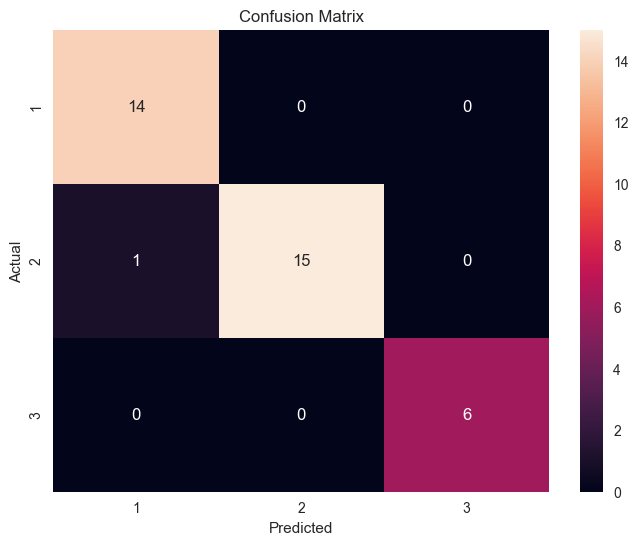

In [11]:
# Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["1","2","3"], yticklabels=["1","2","3"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



## **Practice descriptive questions & answers for theoratical understanding**
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?

<font color='Green'><b>
1. Training accuracy came out to be better for tree based model as compared to support vector machines model, as observed in above cells. The training accuracy for the Decision Tree (DT) model was 1.000000 but for the Support Vector (SVC) model, it is very poor of 0.719101 which is underfitting perhaps. As for validation accuracies, the Decision Tree (DT) model attained 0.921348 but for the Support Vector (SVC) model, it is 0.651685 which is also very poor. Even in this case, the tree-based model is performing better than the support vector machines model. Refer to the results printed in the above cells or the copy of results printed below.

   ```
            Training accuracy  Validation accuracy
   SVC               0.719101             0.651685
   DTC               1.000000             0.921348
   ```

2. The support vector machines model did not work as well as the tree-based model possibly due to the following reasons:
   - SVC is not able to capture the complex and non-linear relationships in the data.
   - SVC is sensitive to the choice of the kernel and the hyperparameters so it might not be tuned properly.

3. The number of samples that were incorrectly classified in step 5.2 is 1 in `Actual` of index mentioned `2`. Refer to the confusion matrix printed in the above cells or the copy of confusion matrix printed below.

   ```
   [ 14  0  0 ]
   [ 1  15  0 ]
   [ 0   0  6 ]
   ```

4. Even though both of them are crucial but in this case, maximizing recall is more important than precision. Since we want to minimize the number of false negatives, we want to make sure that we are able to correctly identify all the positive samples, even if it means that we have a few false positives. Maximizing precision would mean that model will be certain of whatever it predicts, but it will miss out on a lot of positive samples. 

</b></font>

## **Process Description/How code was written/Sourcing etc**
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

<font color='Green'><b>

Using the above written practice questions as guidance, the following layout is used to describe the process:
1. The code I used in this Jupyter Notebook was sourced or writen by me and the existing cells information, where necessary.

2. As per the professional steps carried out in real-world, I filled/completed these cells in the following order:
    - Step 1: Data Input
    - Step 2: Data Processing
    - Step 3: Implement Machine Learning Model
    - Step 4: Validate Model
    - Step 5: Visualize Results and compare models
    - Answring the questions

3. No, I did not use generative AI for this. I manually wrote it based on the requirements.

</b></font>

## **Part 3:** LinearSVC

Repeating Part 2 and comparing the support vector machines model used to `LinearSVC(max_iter=5000)`.

In [13]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

# Instantiating the LinearSVC model
linear_svc_model = LinearSVC(max_iter=5000, random_state=0)
scoring_var = 'accuracy'

# Performing cross-validation for LinearSVC model
linear_svc_scores = cross_validate(linear_svc_model, X, y, scoring=scoring_var, cv=2, return_train_score=True)

# Results for the training and validation accuracy
linear_svc_train = linear_svc_scores['train_score'].mean()
linear_svc_test = linear_svc_scores['test_score'].mean()

train_results, validation_results = [], []
train_results.append(linear_svc_train)
validation_results.append(linear_svc_test)

# Creating a pandas DataFrame to store the results
results = pd.DataFrame({"Training accuracy": train_results, "Validation accuracy": validation_results}, index=['Linear SVC'])

# Printing the results
print(results)


            Training accuracy  Validation accuracy
Linear SVC           0.820225             0.797753


C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Muneeb Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

<font color='Green'><b> NOTE:

Using `LinearSVC` improves the results. Training accuracy jumped from 0.719101 to 0.820225 and Validation accuracy jumped from 0.651685 to 0.797753. It helps a little but not as much as we would have expected since model is still underfitting. And withou scaling the features, it is not a good fit for this dataset at this point. Refer to the results printed in the above cells or the copy of results printed below.

```
               Training accuracy  Validation accuracy
SVC                     0.719101             0.651685
Linear SVC              0.820225             0.797753
```

</b></font>